In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!pip install finance-datareader

In [3]:
import FinanceDataReader as fdr
A = fdr.DataReader('014130',  '2020-05-01', '2021-11-30')

#Prophet

In [4]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
A['y'] = A['Close']
A['ds'] = A.index

In [5]:
#prophet 객체 선언 및 학습
m = Prophet(changepoint_prior_scale=0.8, #보통 changepoint_prior_scale= 0.05로 되어있음 
            yearly_seasonality=True,
            daily_seasonality=True
            )
m.fit(A)
future = m.make_future_dataframe(periods=30) #30일 예측
forecast = m.predict(future)#predict로 예측을 진행합니다. predict 안에는 이전 단계에서 만들어준 future 데이터프레임을 입력합니다.
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-30:-1] #예측 30일을 출력 합니다

,ds,yhat,yhat_lower,yhat_upper
392,2021-12-01,5967.647840,5699.156656,6245.751761
393,2021-12-02,5978.566720,5699.909021,6233.910433
394,2021-12-03,5992.293705,5749.444244,6273.538190
395,2021-12-04,5754.615178,5439.923018,6033.050731
396,2021-12-05,5766.260404,5498.468027,6046.051807
397,2021-12-06,6029.064025,5737.083210,6306.330556
398,2021-12-07,6003.254551,5703.911986,6293.799472
399,2021-12-08,6033.425835,5768.979384,6313.654561
400,2021-12-09,5986.088959,5706.078355,6280.616300
401,2021-12-10,5934.747077,5655.565695,6230.340953


시각화

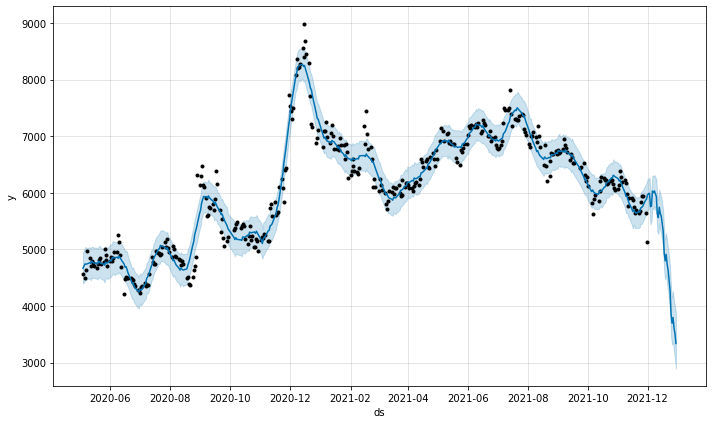

In [6]:
#plot은 트렌드와 함께 예측된 결과물을 시각화하여 보여줍니다.
fig = m.plot(forecast)

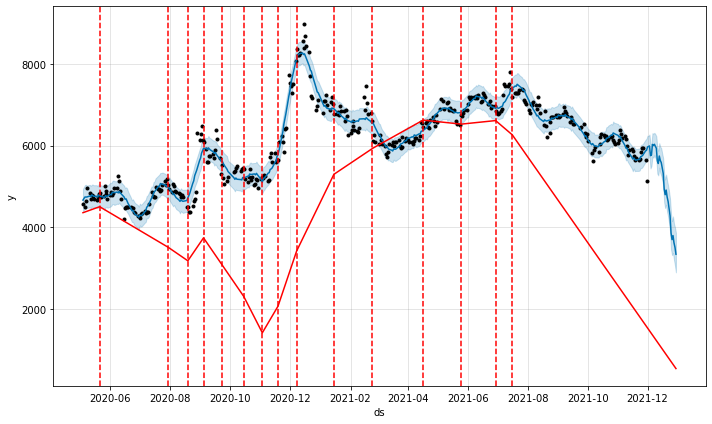

In [7]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [9]:
Close = A['Close']
yhat = forecast[['yhat']].iloc[0:392]
# RMSE
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(Close, yhat) 
np.sqrt(MSE)

216.27480271035827

In [10]:
B = fdr.DataReader('014130', '2019-12-01', '2019-12-31') # test
B

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-12-02,4420,4455,4320,4320,41392,-0.028121
2019-12-03,4280,4300,4210,4275,35272,-0.010417
2019-12-04,4230,4270,4205,4230,21601,-0.010526
2019-12-05,4200,4270,4075,4090,56999,-0.033097
2019-12-06,4040,4265,4040,4220,61236,0.031785
2019-12-09,4220,4375,4220,4315,48264,0.022512
2019-12-10,4455,4540,4155,4170,100646,-0.033604
2019-12-11,4135,4210,4125,4165,39771,-0.001199
2019-12-12,4160,4265,4160,4210,38623,0.010804


In [11]:
B.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2019-12-02 to 2019-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     int64  
 1   High    20 non-null     int64  
 2   Low     20 non-null     int64  
 3   Close   20 non-null     int64  
 4   Volume  20 non-null     int64  
 5   Change  20 non-null     float64
dtypes: float64(1), int64(5)
memory usage: 1.1 KB


In [12]:
B['ds'] = B.index

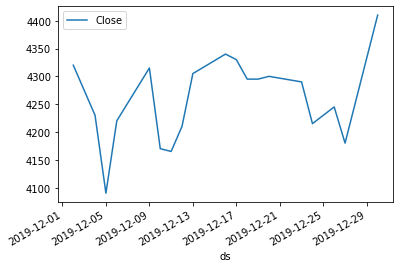

In [13]:
B.plot(x='ds', y='Close')

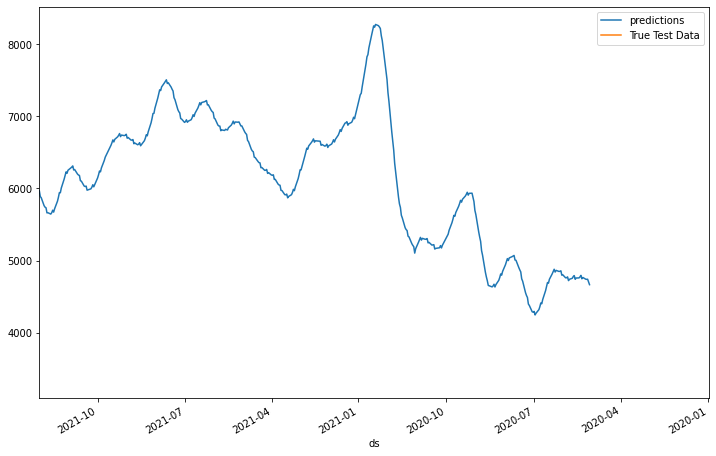

In [14]:
#m.plot(forecast)
ax = forecast[['yhat']].iloc[-1:-30]
ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
B.plot(x='ds', y='Close', legend=True, label='True Test Data',ax=ax,xlim=('2021-12-01', '2019-12-31'))